<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_Bajas_Antiguedad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cuantas serán las bajas voluntarias de los clientes fijos para el periodo 202009. 
 

In [253]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [254]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [255]:
data1 = pd.read_csv('/content/drive/My Drive/Dataset/DBajas_ANTIGUEDAD.txt',delimiter='~')
x = data1.iloc [:,:-1].values
y = data1.iloc [:,2].values

### Codificar datos categóricos

In [ ]:
'''from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder  = LabelEncoder()
labelencoder  = LabelEncoder()
x[:,1] = labelencoder.fit_transform(x[:,1])
ct = ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories='auto'),[1])],remainder='passthrough')
x= np.array(ct.fit_transform(x),dtype=np.integer)'''

In [ ]:
##pd.DataFrame(x)

### Evitar la trampa de variables Dummy

In [ ]:
'''x = x[:,1:]'''

### Dividimos los datos en entrenamiento y test

In [256]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=0)

### Escalamos los datos

In [224]:
'''from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train= sc_x.fit_transform(x_train)
y_train= sc_y.fit_transform(y_train.reshape(-1,1))'''

In [ ]:
'''len(x_train[:,0])

In [ ]:
'''pd.DataFrame(x_train)

In [ ]:
x_train

### DETERMINAR DIMENSIONES.  ELIMINACION HACIA ATRAS

In [ ]:
##x_train=np.append(arr=np.ones((len(x_train[:,0]),1)).astype(int),values=x_train,axis=1)

In [ ]:
##pd.DataFrame(x_train)

In [ ]:
'''import statsmodels.api as sm
def elimnaAtras (x,SL):
  numvar = len(x[0])
  for i in range(0 , numvar):
    regresor_ols = sm.OLS(y, x.tolist()).fit()
    maxvar=max(regresor_ols.pvalues).astype(float)
    if maxvar>SL:
      for j in range(0,numvar-i):
        if (regresor_ols.pvalues[j].astype(float)== maxvar):
          x=np.delete(x,j,1)
  regresor_ols.summary()
  return x
SL=0.05
x_opt = x[:,[0,1,2,3,4,5,6,7]]        
x_modelo = elimnaAtras(x_opt, SL)'''

In [ ]:
##pd.DataFrame(x_modelo)

### MODELO REGRESION POLINOMICA

In [257]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train)

from sklearn.linear_model import LinearRegression
lineal_poly = LinearRegression()
lineal_poly.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [226]:
'''x_valor=sc_x.inverse_transform(x_train)
y_valor= sc_y.inverse_transform(y_train)
y_predic_valor= sc_y.inverse_transform(regression.predict(x_train))'''

In [ ]:
pd.DataFrame(x_train)

In [238]:
pd.DataFrame(y_train)

,0
0,-0.677081
1,-0.621981
2,-0.646470
3,1.239205
4,-0.658714
...,...
60,-0.677081
61,-0.594430
62,1.805519
63,2.142247


In [ ]:
pd.DataFrame(regression.predict(x_train))

ValueError: ignored

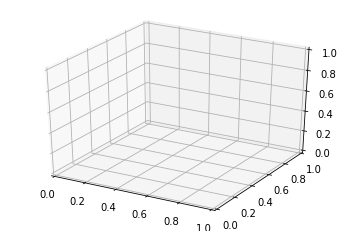

In [218]:
# GRAFICO 3D DATOS ENTRENAMIENTO
# importamos las librerias necesarias

# Creamos la figura
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

x = pd.DataFrame(x_valor)
y = pd.DataFrame(y_valor)
z = pd.DataFrame(y_predic_valor)

x2 = pd.DataFrame(x_valor)*-1
y2 = pd.DataFrame(y_valor)*-1
z2 = pd.DataFrame(y_predic_valor)

# Agregamos los puntos en el plano 3D
ax1.scatter(x, y, z, c='g', marker='o')
ax1.scatter(x2, y2, z2, c='r', marker='o')

# Mostramos el gráfico
plt.show()

In [203]:
pd.DataFrame(x_valor)*-1

,0,1
0,-202007.0,-7.0
1,-202003.0,-3.0
2,-202002.0,-3.0
3,-201909.0,-5.0
4,-201908.0,-2.0
...,...,...
60,-202008.0,-7.0
61,-202006.0,-4.0
62,-202006.0,-5.0
63,-202003.0,-5.0


In [170]:
xx = []; yy = []; yy_predic=[]
ciclo= len(x_train)
for i in range(ciclo):
  xx.append([x_valor[i]])
  yy.append([y_valor[i]])
  yy_predic.append([y_predic_valor[i]])
print("x_train = "+str(xx)+"\n")
print("y_train = "+str(yy)+"\n")
print("y_predic"+str(yy_predic)+"\n")
# Concatenamos 
tabla = np.concatenate((xx, yy,yy_predic), axis=1)
print("Antes de organizar:"+"\n"+str(tabla)+"\n")
# Organizamos y recreamos tabla
tabla[:,0].sort()
for i in range(ciclo):
  n_orgz =  tabla[i,0]
  for ii in range(ciclo):
    n_norgz =  x_valor[ii]
    if (int(n_norgz) == int(n_orgz)):
      tabla[i,1] = y_valor[ii]
      tabla[i,2]= y_predic_valor[ii]
    else:
      pass 
print("Despues de organizar:"+"\n"+str(tabla)+"\n")

x_train = [[array([2.02007e+05, 7.00000e+00])], [array([2.02003e+05, 3.00000e+00])], [array([2.02002e+05, 3.00000e+00])], [array([2.01909e+05, 5.00000e+00])], [array([2.01908e+05, 2.00000e+00])], [array([2.02004e+05, 5.00000e+00])], [array([2.01909e+05, 3.00000e+00])], [array([2.02006e+05, 6.00000e+00])], [array([2.02003e+05, 4.00000e+00])], [array([2.02004e+05, 3.00000e+00])], [array([2.01912e+05, 1.00000e+00])], [array([2.02002e+05, 5.00000e+00])], [array([2.02008e+05, 4.00000e+00])], [array([2.01908e+05, 1.00000e+00])], [array([2.02005e+05, 3.00000e+00])], [array([2.0191e+05, 6.0000e+00])], [array([2.02005e+05, 6.00000e+00])], [array([2.02007e+05, 1.00000e+00])], [array([2.02005e+05, 5.00000e+00])], [array([2.02001e+05, 6.00000e+00])], [array([2.01912e+05, 3.00000e+00])], [array([2.01909e+05, 1.00000e+00])], [array([2.02005e+05, 2.00000e+00])], [array([2.01911e+05, 1.00000e+00])], [array([2.01909e+05, 4.00000e+00])], [array([2.02001e+05, 3.00000e+00])], [array([2.02007e+05, 3.00000e

ValueError: ignored

In [ ]:
# Analizando datos de test
from sklearn.preprocessing import StandardScaler
sc_x_t = StandardScaler()
sc_y_t = StandardScaler()
x_test= sc_x_t.fit_transform(x_test)
y_test= sc_y_t.fit_transform(y_test.reshape(-1,1))

In [ ]:
# MODELO SVR - Test
from sklearn.svm import SVR
regression = SVR(kernel='rbf')
regression.fit(x_test.reshape(-1,1),y_test.ravel())

In [ ]:
x_valor_t=sc_x_t.inverse_transform(x_test)
y_valor_t= sc_y_t.inverse_transform(y_test)
y_predic_valor_t= sc_y_t.inverse_transform(regression.predict(x_test.reshape(-1,1)))

In [ ]:
xx_t = []; yy_t =[]; yy_predic_t=[]
total_ciclo= len(x_test[:,0])
for i in range( total_ciclo ):
  xx_t.append(pd.DataFrame([x_valor_t[i]]))
  yy_t.append(pd.DataFrame([y_valor_t[i]]))
  yy_predic_t.append(pd.DataFrame([y_predic_valor_t[i]]))
print("x_valor_t = "+str(xx_t)+"\n")
print("y_valor_t = "+str(yy_t)+"\n")
print("y_predic_t"+str(yy_predic_t)+"\n")
# Concatenamos 
tabla_t = np.concatenate((xx_t, yy_t,yy_predic_t), axis=1)
print("Antes de organizar el test:"+"\n"+str(tabla_t)+"\n")
# Organizamos y recreamos tabla test
tabla_t[:,0].sort()
for i in range(total_ciclo) :
  n_orgz_t =  tabla_t[i,0]
  for ii in range( total_ciclo ):
    n_norgz_t =  x_valor_t[ii]
    if (int(n_norgz_t) == int(n_orgz_t)):
      tabla_t[i,1] = y_valor_t[ii]
      tabla_t[i,2]= y_predic_valor_t[ii]
    else:
      pass 
print("Despues de organizar:"+"\n"+str(tabla_t)+"\n")

In [ ]:
# Graficamos 
plt.scatter(tabla[:,0],tabla[:,1],color='Red', marker='^',alpha=0.5)
plt.plot(tabla[:,0],tabla[:,2],color='Blue', marker='^',alpha=0.5)
plt.title("Bajas vs SVR")
plt.xlabel("Periodo Baja")
plt.ylabel("Cantidad")
plt.show()

In [ ]:
# Graficamos test
plt.scatter(tabla_t[:,0],tabla_t[:,1],color='Red', marker='^',alpha=0.5)
plt.plot(tabla_t[:,0],tabla_t[:,2],color='Blue', marker='^',alpha=0.5)
plt.title("Bajas TEST vs SVR")
plt.xlabel("Periodo Baja")
plt.ylabel("Cantidad")
plt.show()

In [ ]:
'''nuevo= np.array([])
for i in range(202009 , 202012):
  nuevo= np.append(nuevo, i)
y_pred=sc_y.inverse_transform(regression.predict(sc_x.transform(nuevo.reshape(-1,1))))
pd.DataFrame(y_pred)'''